In [1]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check dimension of dataset

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
# Minimum values for Glucose, Blood pressure and BMI can not be zero. Lets replace them with median values. 
df["Glucose"].replace(0,df["Glucose"].median(),inplace=True)
df["BloodPressure"].replace(0,df["BloodPressure"].median(),inplace=True)
df["BMI"].replace(0,df["BMI"].median(),inplace=True)

### Check distribution of dependent variable, Outcome and plot it (1 Marks)

In [6]:
df.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


D:\Softwares\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


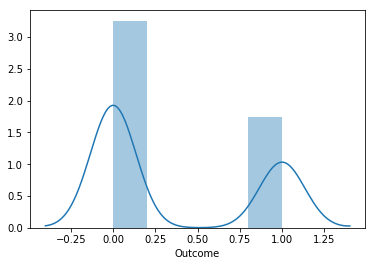

In [7]:
import seaborn as sns
sns.distplot(df['Outcome'])

D:\Softwares\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
D:\Softwares\anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
D:\Softwares\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


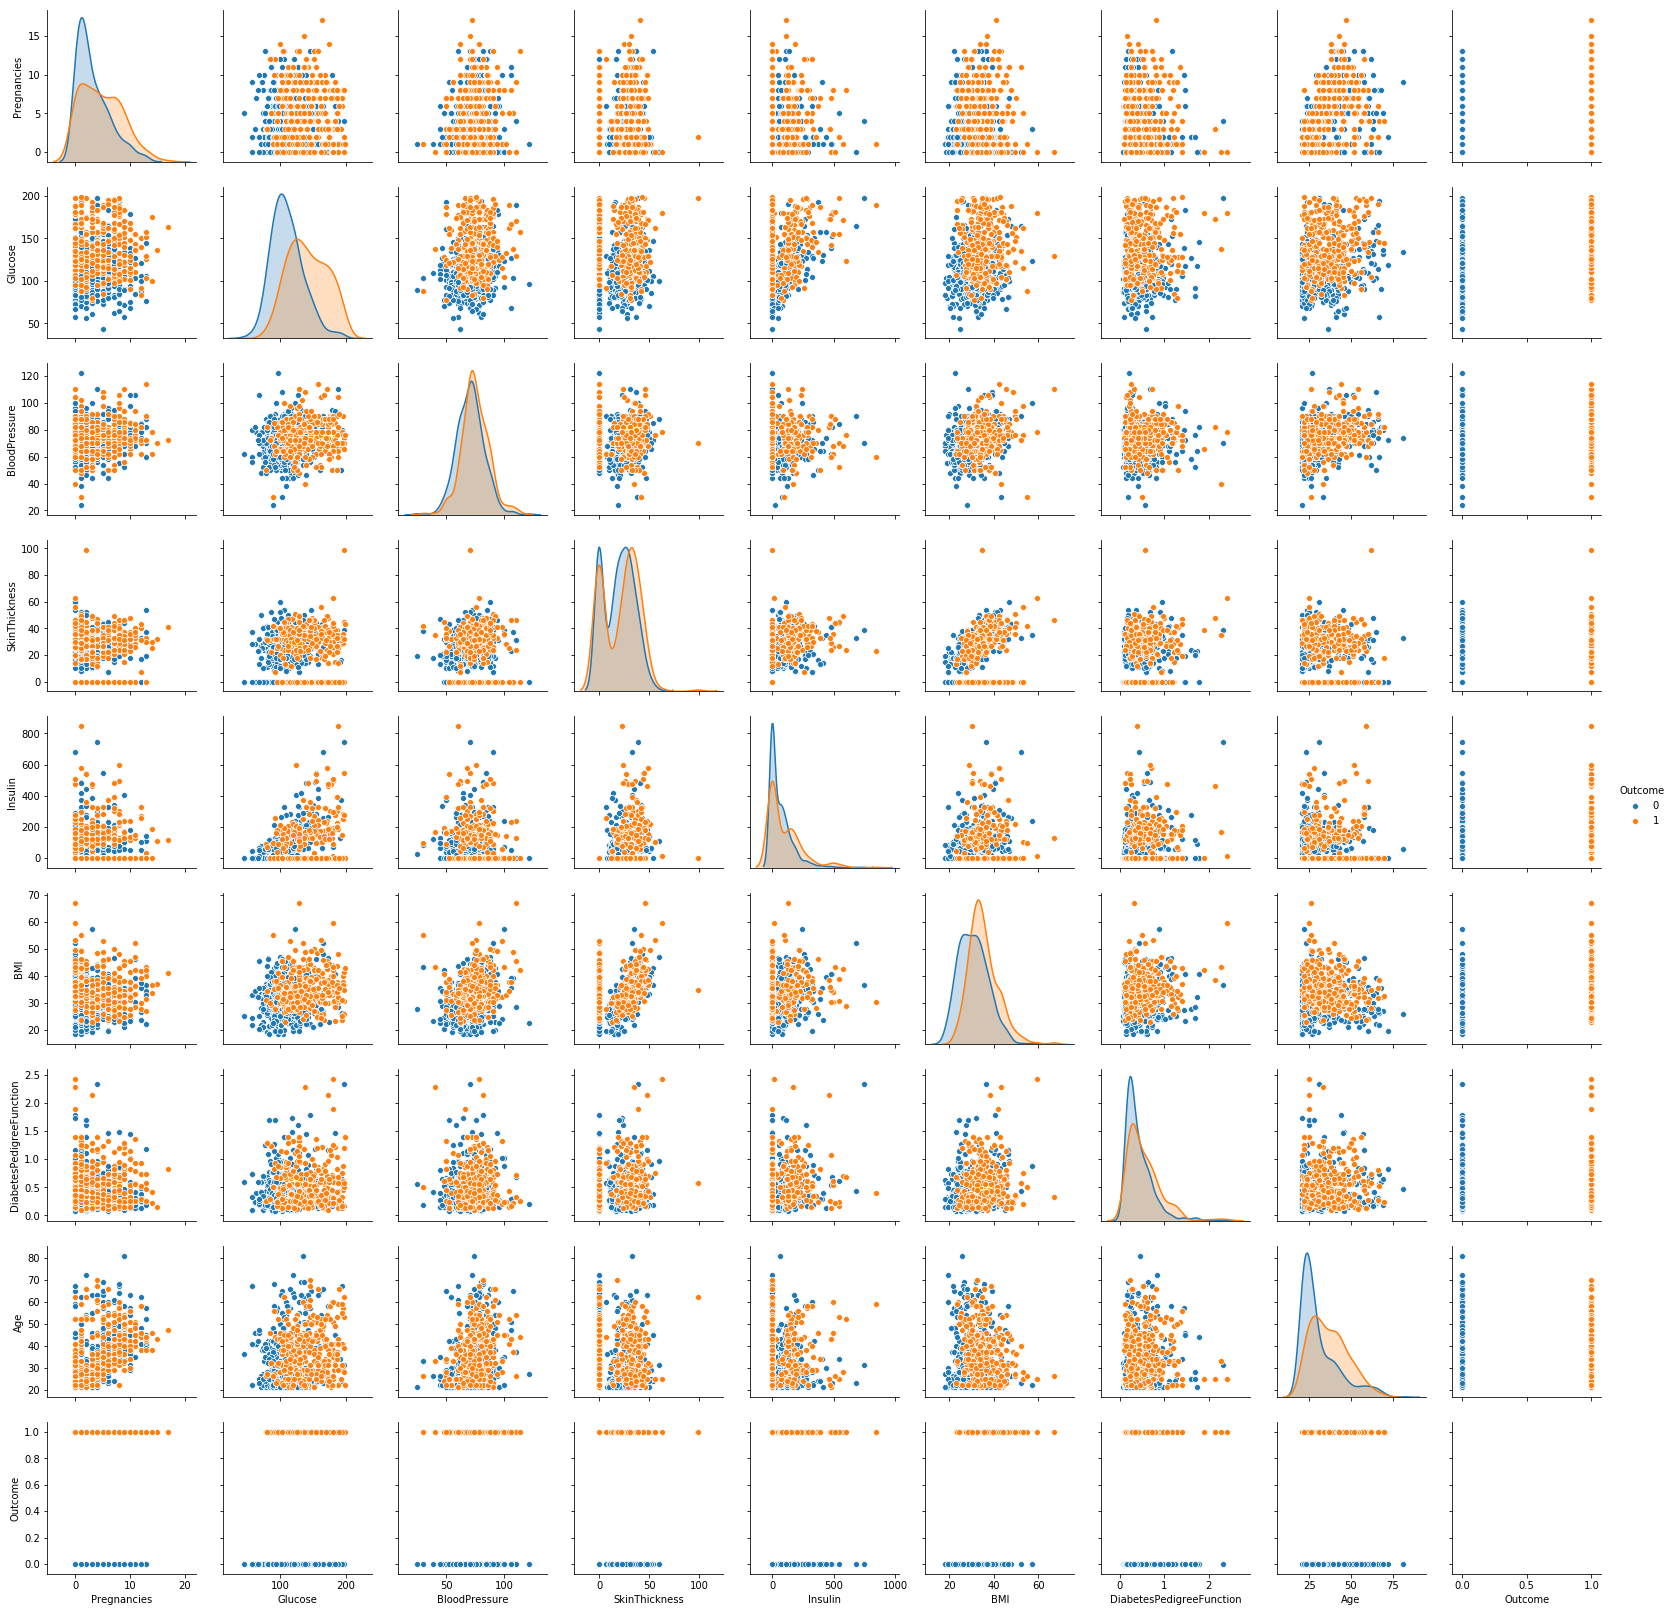

In [8]:
sns.pairplot(df, diag_kind='kde', hue='Outcome')

In [9]:
#Looks like there are not much correlation among dependent variables. 
#Few of the dependent variables like BMI, Blood Pressure, Glucose are almost normally distributed. 
#Age, Inssulin, Pregenancies, DiabeticsPedigree function have skewed distribution. 

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

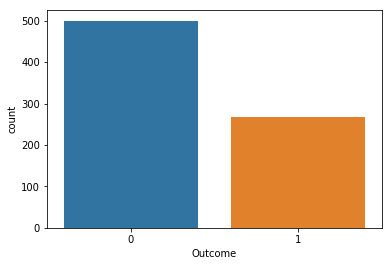

In [10]:
sns.countplot(x='Outcome',data = df)

### Check data distribution using summary statistics and provide your findings(2 Marks)

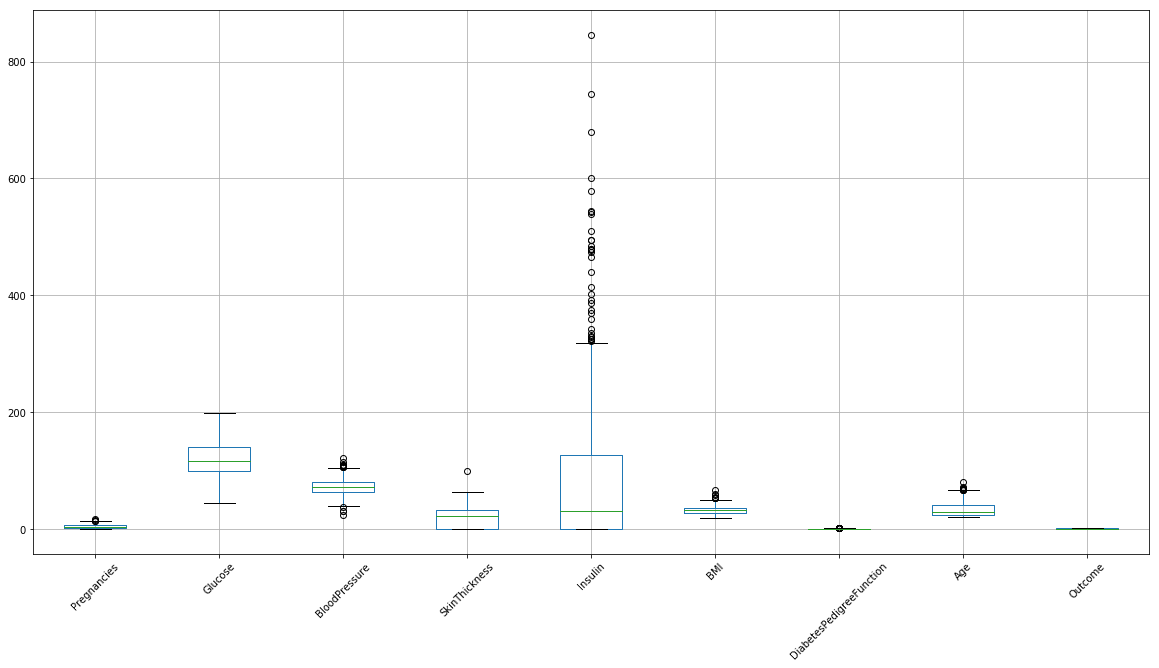

In [11]:
df.boxplot(figsize = (20,10), rot=45)

In [12]:
# from above it is found that insulin has more outlier and need to normailize the data

### Do correlation analysis and bivariate viualization with Insights(1 Marks)

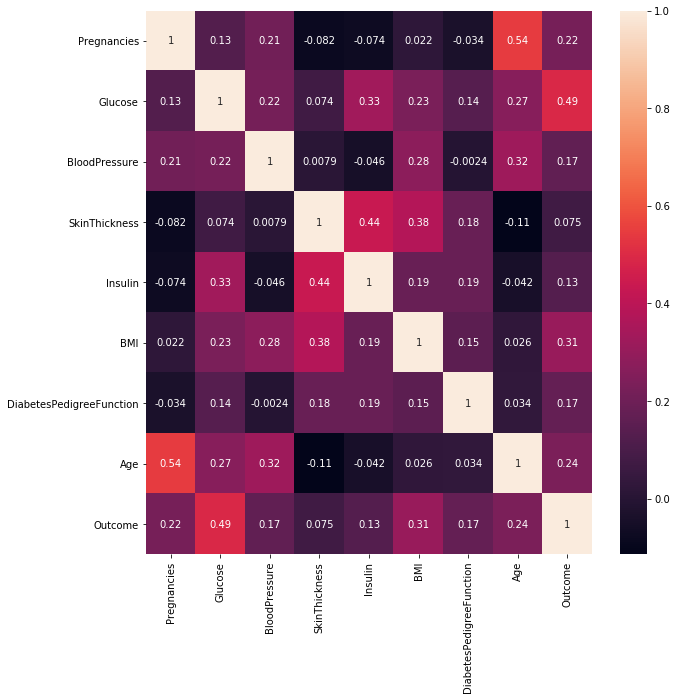

In [13]:
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True)

In [14]:
# based on correlation mapping it is found that dependent variable and independent variables are not highly correlated

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

In [15]:
X = df.drop("Outcome", axis=1)
Y = df["Outcome"]

In [16]:
from scipy.stats import zscore
X = X.apply(zscore)

In [17]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.3, random_state=1)

### Train Support Vector Machine Model(1 Marks)

In [18]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(x_train, y_train)

D:\Softwares\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [19]:
y_pred = svc_model.predict(x_test)

In [20]:
print(svc_model.score(x_train, y_train))
print(svc_model.score(x_test, y_test))

0.8268156424581006
0.7835497835497836


### Scale the data points using MinMaxScaler ( 1 Marks)

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [22]:
svc_model = SVC()
svc_model.fit(x_train_scaled, y_train)

D:\Softwares\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
x_test_scaled = scaler.transform(x_test)

In [24]:
y_pred = svc_model.predict(x_test_scaled)

In [25]:
print(svc_model.score(x_train_scaled, y_train))
print(svc_model.score(x_test_scaled, y_test))

0.7653631284916201
0.7792207792207793


#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [26]:
for k in ['rbf','linear']:
    model = SVC(kernel=k, C=1000)
    model.fit(x_train_scaled, y_train)
    y_pred = model.predict(x_test_scaled)
    print(k, '- train :', model.score(x_train_scaled, y_train))
    print(k, '- test :',model.score(x_test_scaled, y_test))

rbf - train : 0.7951582867783985


D:\Softwares\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


rbf - test : 0.8095238095238095
linear - train : 0.776536312849162
linear - test : 0.7835497835497836


In [27]:
#After increasing C, result for both the kernels has improved. 

### Here, increasing C allows us to improve the model, resulting in ??? accuracy.
### Let's try to explore different Kernel and C (Bonus for practice)

In [28]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [29]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [30]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [31]:
gs.fit(x_train_scaled, y_train) 

D:\Softwares\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=2,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [32]:
gs.best_estimator_

SVC(C=1.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
gs.best_score_ 

0.7728119180633147